# Introduction to admcycles II: Geometrically defined cycle classes

## 1) Introduction
In the first part of the lecture, we saw the notion of tautological classes and how we can use ``admcycles`` to multiply them, take intersection numbers and compare them. Now all we need is some interesting classes to do actual computations with!

Luckily, using the fact that $\overline{\mathcal{M}}_{g,n}$ is a moduli space, there are many ways to construct new cohomology classes on it. Many (though not all) of them actually result in tautological classes, and again many (though not all) of these have been implemented in ``admcycles``. Below, we go through the classes that have been implemented and show how to use them (and comment on what is still to do).

## 2) Admissible cover cycles
### Cycles associated to closed subsets
For $S \subset \overline{\mathcal{M}}_{g,n}$ a closed, algebraic subset of $\mathbb{C}$-codimension $d$, there exists a fundamental class
    $$[S] \in H_{\dim - 2d}(\overline{\mathcal{M}}_{g,n}) \cong H^{\dim - 2d}(\overline{\mathcal{M}}_{g,n})^\vee \underset{\mathrm{PD}}{\cong} H^{2d}(\overline{\mathcal{M}}_{g,n}),$$
where $\mathrm{PD}$ is the isomorphism from *Poincaré duality*.

### Example : Hyperelliptic cycles
An important example of closed subsets of $\overline{\mathcal{M}}_{g,n}$ are the loci of *hyperelliptic curves*. Recall that a curve $C$ is hyperelliptic, if it admits a degree $2$ cover
$$
\varphi : C \to \mathbb{P}^1\,.
$$
Given such a cover (which for curves of genus $g \geq 2$ is uniquely determined by $C$ itself), we say that
* a point $p \in C$ is a *Weierstrass point* if there exists $b \in \mathbb{P}^1$ with $\varphi^{-1}(b)=\{p\}$, which is equivalent to $\varphi$ having multiplicity $2$ at $p$,
* a pair of distinct points $q, q' \in C$ is *hyperelliptic conjugate* if there exists $b \in \mathbb{P}^1$ with $\varphi^{-1}(b)=\{q, q'\}$
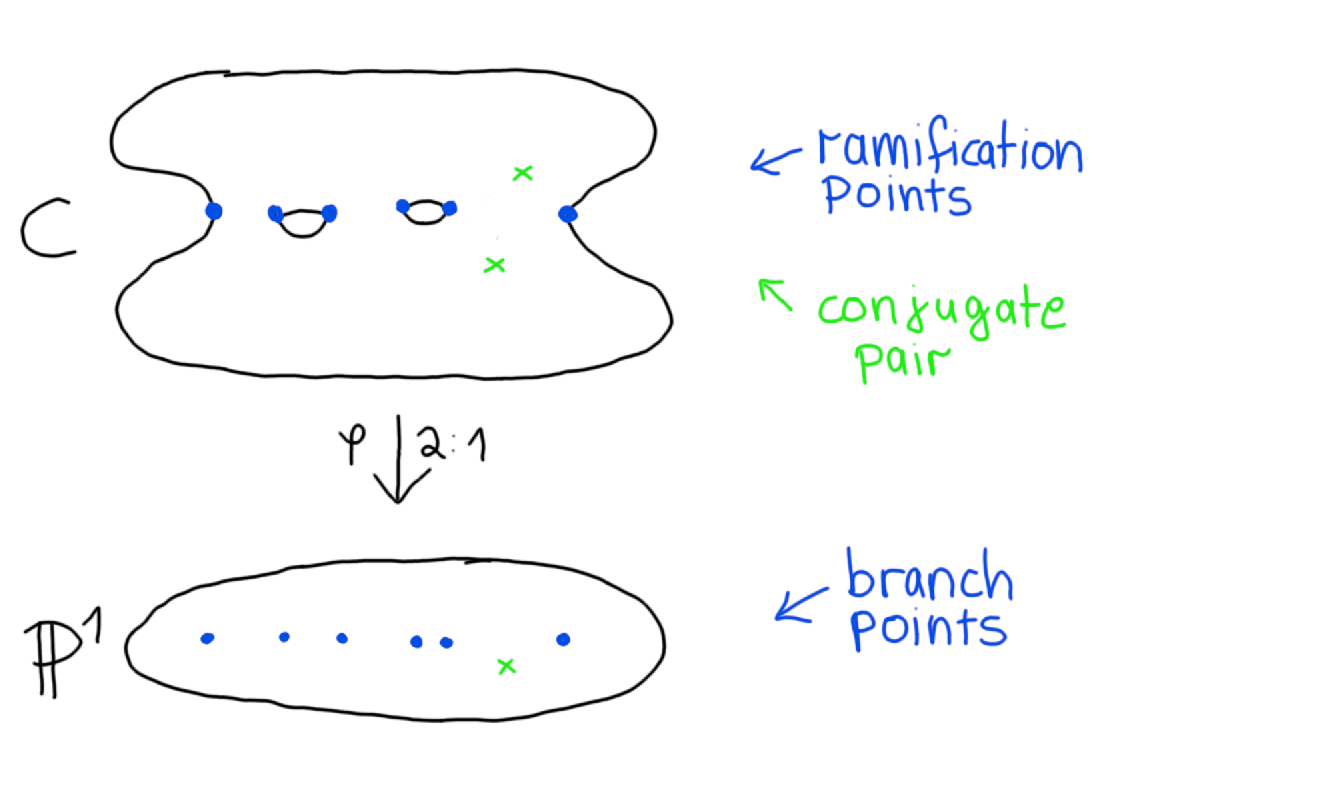

Then we have a locus of marked hyperelliptic curves defined by
\begin{equation*}
\mathrm{Hyp}_{g,n,2m} = \left\{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : \begin{array}{c} C \text{ hyperelliptic},\\p_i\text{ Weierstrass points},\\ q_j, q_j' \text{ hyperelliptic conjugate}\end{array} \right\} \subset \mathcal{M}_{g,n+2m}
\end{equation*}

In [Faber-Pandharipande 2005](https://doi.org/10.4171/JEMS/20), the authors showed that the fundamental classes of the closures

\begin{align*}
[\overline{\mathrm{Hyp}}_{g,n,2m}] \in H^*(\overline{\mathcal{M}}_{g,n+2m}),
\end{align*}

are always tautological. In [Schmitt-van Zelm  2018](https://arxiv.org/pdf/1808.05817.pdf) with Jason van Zelm we give an algorithm to compute intersection numbers of the hyperelliptic cycles with tautological classes. Using these numbers, the package `admcycles` can compute them (in many cases) via the function `Hyperell(g,n,m)`.

In [15]:
from admcycles import *
H = Hyperell(2,1)
Hpush = H.forgetful_pushforward([1])
Hpush.simplify()

Graph :      [2] [[]] []
Polynomial : 6

Here we see that every curve of genus $g=2$ is hyperelliptic, and has precisely $2g+2=6$ Weierstrass points.

<b>Exercise</b> <br>
A classical computation by [Harris-Mumford 82](https://www.dam.brown.edu/people/mumford/alg_geom/papers/1982a--KodDim-Harris-GT.pdf) says that
$$
[\overline{\mathrm{Hyp}}_{3}] = 9 \lambda_1 - \delta_0 - 3 \delta_1\,,
$$
where $\delta_0$ is the class of the boundary divisor of irreducible nodal curves and $\delta_1$ is the class of the divisor where the curve generically has irreducible components of genera $1,2$ connected at a node.

Verify this equality.

*Hint:* Be careful: the gluing map parameterizing $\delta_0$ has generic degree $2$ ...

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
H = Hyperell(3)
H == 9*lambdaclass(1,3,0) - 1/2*irrbdiv(3,0) - 3*sepbdiv(1,(),3,0)
> True
```

</details>

### More general admissible Galois covers
Generalizing the hyperelliptic loci above, the package ``admcycles`` can compute many fundamental classes of loci of admissible Galois covers
$$
\varphi : C \to D\,,
$$
where we fix
* the genus of $C$,
* the Galois group $G$, which acts transitively on the fibres of $\varphi$,
* the ramification behaviour of $\varphi$, by specifying a tuple $(h_1, \ldots, h_b) \in G^b$ of elements generating the stabilizer groups of points in $C$ (which become the ramification points of $\varphi$).

Computing these cycles was the original motivation for writing ``admcycles`` (hence the name). For more details see my paper [Schmitt-van Zelm 2020](https://doi.org/10.1007/s00029-020-00603-4).

### Outlook
Based on work of Matthias Hippold and Zekun Ji, we hope to write functions for computing cycles of admissible covers which are not necessarily Galois, where only the degree and the ramification profiles over the branch points are specified.

Moreover, Johannes Schwab has been working on some code of even more general admissible cover cycles, as specified by [Lian 2021](https://link.springer.com/article/10.1007/s00029-021-00711-9).

Since the computations of the hyperelliptic cycles often take a long time, a worthwhile goal would be to program a database of such cycles which have been computed. Talk to me if you are interested!

## 3) Strata of $k$-differentials
Given $\textbf{a}=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2)$, we consider the locus
\begin{align*}
\mathcal{H}_g^k(\textbf{a}) &= \left \{(C,p_1, \ldots, p_n) : \omega_C^{\otimes k} \cong \mathcal{O}_C \left( \sum_{i=1}^n a_i p_i \right) \right \} \\
&=\left \{(C,p_1, \ldots, p_n) : \begin{array}{c} \exists\, \eta \text{ meromorphic $k$-differential on $C$}\\\text{ with }\mathrm{div}(\eta) =\sum_{i=1}^n a_i p_i  \end{array} \right \}\subseteq \mathcal{M}_{g,n}.
\end{align*}
Then $\mathcal{H}_g^k(\textbf{a})$ is a closed algebraic subset of $\mathcal{M}_{g,n}$ and taking the fundamental class of the closure $\overline{\mathcal{H}}_g^k(\textbf{a})$, we obtain cohomology classes
$$[\overline{\mathcal{H}}_g^k(\textbf{a})] \in H^*(\overline{\mathcal{M}}_{g,n}).$$

These classes have been studied intensely in the last couple of years. Some highlights:
- In the appendix of the paper [Farkas-Pandharipande 2015](https://doi.org/10.1017/S1474748016000128), Janda, Pandharipande, Pixton and Zvonkine wrote down a conjectural formula
$$[\overline{\mathcal{H}}_g^k(a_1, \ldots, a_n)] + \sum \text{(boundary corrections)} = \mathrm{DR}_g(a_1+k, \ldots, a_n+k)$$
relating the classes of strata of meromorphic differentials to the so-called *double ramification cycles* (which we discuss below). These DR cycles are computed  by an explicit formula in the tautological ring proposed by Pixton. This conjecture was recently proven by combining the results of papers [Holmes-Schmitt - 2019](https://arxiv.org/abs/1909.11981), [Bae-Holmes-Pandharipande-Schmitt-Schwarz 2020](https://arxiv.org/abs/2004.08676). The above formula can be used to recursively compute *all* cycles $[\overline{\mathcal{H}}_g^k(a_1, \ldots, a_n)]$, both in the holomorphic and meromorphic case. 
This has been implemented in the function ``Strataclass(g,k,(a1, ..., an))``.

In [16]:
H = Strataclass(2,1,(2,))             # computes closure of {(C,p) : omega_C = O_C(2p)}
H2 = Hyperell(2,1)                    # computes closure of {(C,p) : p Weierstrass point}
H == H2

True

<b>Exercise</b> <br>
For $k=1$ and a vector $\textbf{a}$ containing only nonnegative entries except for a single entry $-1$, the condition cutting out $\mathcal{H}_g^1(\textbf{a})$ requires the existence of a meromorphic $1$-differential with a single simple pole. This cannot exist on a smooth curve by the residue theorem (the sum of residues must vanish, but a single simple pole has nonzero residue).

Pick your favorite example of $g, \textbf{a}$ with these conditions and verify that indeed $[\overline{\mathcal{H}}_g^1(\textbf{a})]=0$ (which follows from $\mathcal{H}_g^1(\textbf{a}) = \emptyset$).

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
H = Strataclass(2,1,(3,-1))
H == 0
> True
```

</details>

- The strata $\overline{\mathcal{H}}_g^k(\textbf{a})$ themselves were studied in a series of papers by Bainbridge, Chen, Gendron, Grushevsky, Möller ([BCGGM  2018](https://doi.org/10.1215/00127094-2018-0012), [BCGGM  2019](https://doi.org/10.14231/ag-2019-011), [BCGGM  2020](https://arxiv.org/abs/1910.13492)). In particular, the authors define for $k=1$ a smooth compact moduli space
$$ \mathcal{MS}_g(\textbf{a}) \to \overline{\mathcal{H}}_g(\textbf{a}),$$
sitting proper, birationally over $\overline{\mathcal{H}}_g^1(\textbf{a})$, called the space of *multiscale differentials*. They describe the boundary strata of $\mathcal{MS}_g(\textbf{a})$ (and thus of $\overline{\mathcal{H}}_g^1(\textbf{a})$) in terms of certain *enhanced level graphs*.
- The intersection theory and tautological ring of $\mathcal{MS}_g(\textbf{a})$ have been implemented by [[Costantini-Möller-Zachhuber  2020](https://arxiv.org/abs/2006.12815) in an extension/sub-package of ``admcycles`` called ``diffstrata``. They use this in a second paper [Costantini-Möller-Zachhuber 2020](http://arxiv.org/abs/2006.12803) to compute the (orbifold) Euler characteristics of the open strata ${\mathcal{H}}_g^1(\textbf{a})$ in a range of examples.

In [17]:
from admcycles.diffstrata import Stratum
X = Stratum((2,))
X.euler_characteristic()

-1/40

Using ``diffstrata``, we can also compute more general versions of the strata of differentials, where we impose *residue conditions* at the marked points. The code below computes the fundamental class of the locus $\overline{S} \subseteq \overline{\mathcal{M}}_{1,4}$ of genus $1$ curves $(C, p, q_1, q_2, q_3)$ such that there exists a meromorphic differential $\eta$ with $\mathrm{div}(\eta) = 6 p - 2q_1 -2 q_2 -2 q_3$ such that $\mathrm{Res}_{q_i} \eta = 0$ for $i=1,2$ (and thus also $i=3$ by the residue theorem).

In [18]:
S = Strataclass(1,1,[6,-2,-2,-2],res_cond=[2,3],method='diffstrata')
(S.forgetful_pushforward([2,3,4])-42*fundclass(1,1)).is_zero()

True

<b>Exercise</b> <br>
In Theorem 1.3 of [Castorena-Gendron 2020](https://arxiv.org/abs/2003.12001) the authors claim that for the forgetful map $\pi: \overline{\mathcal{M}}_{1,4} \to \overline{\mathcal{M}}_{1,1}$ forgetting the points $q_1, q_2, q_3$, the induced map $\pi : S \to \overline{\mathcal{M}}_{1,1}$ is a cover of degree $42$. Can you check the corresponding cohomological statement?

<details><summary><b>Solution</b> (click to expand)</summary>

```
T = S.forgetful_pushforward([2,3,4])
T.simplify()
>
Graph :      [1] [[1]] []
Polynomial : 42
T.fund_evaluate()
> 42
```

</details>

### Outlook
Johannes Schwab is going to tell us more about ``diffstrata`` and some developments for extending the computations in that package from $k=1$ to arbitrary $k \geq 1$.

On the other hand, for $k=1$ and when all entries of $\textbf{a}$ are even, the space ${\mathcal{H}}_g^1(\textbf{a})$ decomposes into connected components (according to the parity of some spin structure). Yiu Man Wong is developing some code to compute the fundamental classes of the closures of these components separately.

## 4) Double ramification cycles
### Construction and intuition
When discussing strata of $k$-differentials, we mentioned that double ramification cycles played an important role for computing them. These cycles are not as straightforward to define as the admissible cover cycles or strata of differentials, but here is a reasonably nice construction:

> **Construction** ([Bae-Holmes-Pandharipande-Schmitt-Schwarz 2020](https://arxiv.org/abs/2004.08676))<br>
> Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. Consider the space
$$
\mathfrak{P}ic_g = \{(C, \mathcal{L}) : C \text{ prestable curve of genus }g, \mathcal{L}\text{ line bundle on }C\}
$$
It contains the locus $e = \{(C, \mathcal{O}_C)\}$ where $\mathcal{L}$ is trivial, and we denote by $\overline{e}$ the closure of this locus and by $[\overline{e}] \in H^{2g}(\mathfrak{P}ic_g)$ its fundamental class in cohomology.
We have a map
$$
\sigma_A : \overline{\mathcal{M}}_{g,n} \to \mathfrak{P}ic_g, (C, p_1, \ldots, p_n) \mapsto \left(C, (\omega_C^\mathrm{log})^{\otimes k}(- \sum_{i=1}^n a_i p_i) \right) = \left(C, \omega_C^{\otimes k}(- \sum_{i=1}^n (a_i-k) p_i) \right)\,.
$$
Then we define the double-ramification cycle
$$
\mathrm{DR}_g(A) = \sigma_A^* [\overline{e}] \in H^{2g}(\overline{\mathcal{M}}_{g,n}).
$$

This might be heavy to swallow, but the following intuition will be enough to remember:

> **Intuition**<br>
The cycle $\mathrm{DR}_g(A)$ describes the condition on $\overline{\mathcal{M}}_{g,n}$ that $\omega_C^{\otimes k} \cong \mathcal{O}_C(\sum_{i=1}^n (a_i-k) p_i)$.

This intuition motivates why we should expect a connection to the strata of $k$-differentials (and making this precise took the largest part of the papers [Holmes-Schmitt 2021](https://www.doi.org/10.1112/S0010437X21007557) and [Bae-Holmes-Pandharipande-Schmitt-Schwarz 2020](https://arxiv.org/abs/2004.08676)).

### A formula in the tautological ring
Luckily, despite its involved construction(s), the double ramification cycle has a formula in the tautological ring, first conjectured by Pixton and proved in the subsequent years:

> **Construction** (Pixton - 2014)<br> 
Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. 
Then for any integer $r \geq 1$ Pixton gave an explicit formula
$$\mathrm{DR}_g^{\,d,k,r}(A) = \sum_{\Gamma,w} \left[\Gamma, \text{(polynomial in $\kappa,\psi$-classes depending on $w$)} \right]\in RH^{2d}(\overline{\mathcal{M}}_{g,n}),$$
where the sum runs over stable graphs $\Gamma$ and *admissible weightings* $w$ *mod* $r$ on $\Gamma$ (some additional combinatorial gadget). The coefficient of each individual term $[\Gamma, \alpha]$ above expression turns out to be a polynomial in $r$ for $r \gg 0$ and we define the double ramification cycle in degree $d$ as the value
$$\mathrm{DR}_g^{\,d,k}(A) = \mathrm{DR}_g^{\,d,k,r}(A)|_{r=0} \in RH^{2d}(\overline{\mathcal{M}}_{g,n})$$
of this polynomial at $r=0$. The cycle constructed above is then given as the degree $g$ part:
$$
\mathrm{DR}_g(A) = \mathrm{DR}_g^{\,g,k}(A)\,.
$$


The tautological class $\mathrm{DR}_g^{\,d,k}(A)$ is  accessible in `admcycles` by the function `DR_cycle(g,A,d)` and we can even compute $\mathrm{DR}_g^{\,d,k,r}(A)$ using `DR_cycle(g,A,d,rpoly=True)`.

In [19]:
Dr = DR_cycle(1,[2,-2],1,rpoly=True); Dr

Graph :      [1] [[1, 2]] []
Polynomial : 2*psi_1 + 2*psi_2

Graph :      [0] [[4, 5, 1, 2]] [(4, 5)]
Polynomial : 1/24*r^2 - 1/24

In [20]:
D = DR_cycle(1,[2,-2],1); D

Graph :      [1] [[1, 2]] []
Polynomial : 2*psi_1 + 2*psi_2

Graph :      [0] [[4, 5, 1, 2]] [(4, 5)]
Polynomial : -1/24

Note that the ``d`` is an optional parameter, so that ``DR_cycle(g,A)`` computes it for ``d`` equal to $g$.

### Nice properties of double ramification cycles
Below we collect some interesting results about double ramification cycles and how to check them in ``admcycles``.

#### Hain's formula
Before Pixton's formula was around, the first computation of the double ramification cycle was by [Hain 2011](https://arxiv.org/abs/1102.4031). He showed (formulated in modern notation) that for $D = \mathrm{DR}_g^{\ 1,k}(A)$ one has
$$
\mathrm{DR}_g(A) = \frac{D^g}{g!} \in H^{2g}(\mathcal{M}_{g,n}^\mathrm{ct})
$$
as an equality on the moduli space of compact type curves.

<b>Exercise</b> <br>
For $g=2, n=2$ pick your favourite example of $k, A$ and check that the equality above holds. Also check that it does *not* hold on all of $\overline{\mathcal{M}}_{g,n}$. 

<details>
<summary><b>Solution</b> (click to expand)</summary>
    
```
diff = DR_cycle(2,(0,0)) - 1/2 * DR_cycle(2,(0,0),1)^2
diff.is_zero(moduli='ct')
> True
diff.is_zero()
> False
```

</details>

### Chiodo classes and an (un)expected vanishing
There is a variant of the double ramification cycle formula $\mathrm{DR}_g^{\,d,k,r}(A)$, sometimes called the *Chiodo class*. 

> **Construction**<br>
Let $\overline{\mathcal{M}}_{g,A}^{r,k}$ be the compactification of the moduli space of $r$-th roots of the line bundle $(\omega_C^\mathrm{log})^{\otimes k}(- \sum_{i=1}^n a_i p_i)$. It has universal curve $\pi : \mathcal{C} \to \overline{\mathcal{M}}_{g,A}^{r,k}$ and universal $r$-th root $\mathcal{L}$ on $\mathcal{C}$ and a forgetful map $\epsilon: \overline{\mathcal{M}}_{g,A}^{r,k} \to \overline{\mathcal{M}}_{g,n}$. Then the Chiodo class is given by
$$
\mathrm{DR}_g^{\,d,k,r}(A)^\mathrm{Chiodo} = r^{2d-2g+1} \epsilon_* c_d(- R^* \pi_* \mathcal{L}) \in H^{2d}(\overline{\mathcal{M}}_{g,n}).
$$

This class has the nice property that
$$
\mathrm{DR}_g^{\,d,k,r}(A)^\mathrm{Chiodo}|_{r=0} = \mathrm{DR}_g^{\,d,k,r}(A) |_{r=0}\,
$$
and it can be computed using 
* ``DR_cycle(g,A,d,chiodo_coeff=True,r_coeff=r)`` to compute the above class for a concrete value of $r$,
* ``DR_cycle(g,A,d,chiodo_coeff=True,rpoly=True)`` to get the polynomial in $r$ which computes the above class for $r \gg 0$

This cycle appears in lots of computations related to ELSV formulas (see e.g. [Borot-Do-Karev-Lewanski 2020](https://arxiv.org/abs/2002.00900), [Do-Lewanski 2020](https://arxiv.org/abs/2003.08043)). 

Here, I want to show some interesting vanishing phenomena related to this. The first concerns the classical double ramification cycles:

> **Theorem** ([Clader-Janda 2016](https://arxiv.org/abs/1601.02871))<br> 
> Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. Then $\mathrm{DR}_g^{\,d,k}(A)$ vanishes in degree $d>g$.

We can check this in an example:

In [21]:
D = DR_cycle(2,(3,-3),d=3,chiodo_coeff=True,rpoly=True)
D.basis_vector()

(282*r^2 - 3243/4*r, -72*r^2 + 207*r, 6*r^2 - 69/4*r, -165/4*r, 95/4*r, 18*r^2 - 3/2*r, -107/4*r, -95*r, -18*r^2 + 213/4*r, 83*r, -18*r^2 + 987/4*r, 54*r^2 - 513/4*r, -45*r^2 + 1089/8*r, 9*r^2 - 225/8*r)

The fact that all entries are divisible by $r$ means that the specialization at $r=0$, which is $\mathrm{DR}^{\ 3,k}_2(A)$, vanishes as desired.

The second is more interesting, and concerns the Chiodo class from above:

> **Theorem** ([Fan-Wu-You 2019](https://arxiv.org/abs/1907.07133))<br> 
> Let $g,d,u \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = 0$. Then $\mathrm{DR}_g^{\,d,k}(A)^\mathrm{Chiodo}[r^u]$ vanishes in degree $d>g+u$, where the notation $[r^u]$ indicates that we take the coefficient of the monomial $r^u$ of the cycle class with coefficients being polynomials in $r$.

Here is an example for $g=2, d=4, u=1$:

In [22]:
D = DR_cycle(2,(3,-3),d=4,chiodo_coeff=True,rpoly=True)
D.basis_vector()

(432264/19*r^2, -75600/19*r^2, -18018/19*r^2, 354*r^2, 18720/19*r^2, -2160/19*r^2)

However, the experiment below suggests that the theorem remains true when we allow $\sum_i a_i = k(2g-2+n)$ for arbitrary $k$:

In [23]:
D = DR_cycle(2,(3,1),d=4,chiodo_coeff=True,rpoly=True)
D.basis_vector()

(-40292/285*r^2, 2429/95*r^2, 588/95*r^2, -7/3*r^2, -623/95*r^2, 77/95*r^2)

### Double ramification cycles with polynomial coefficients
It turns out that there is an extra polynomiality hidden in the double ramification cycles

> **Fact** (Pixton-Zagier 20??)<br>
> The double ramification cycle $\mathrm{DR}_g^{\ d,k}(A)$ is a polynomial in the entries of $A=(a_1, \ldots, a_n)$ of degree $2d$.

Using multivariate interpolation, this polynomial-coefficient tautological class can be computed in ``admcycles``:

In [24]:
R.<a1,a2,a3> = PolynomialRing(QQ,3)
D = DR_cycle(1,(a1,a2,a3))
D

Graph :      [1] [[1, 2, 3]] []
Polynomial : (-1/18*a1^2 - 1/9*a1*a2 - 1/18*a2^2 - 1/9*a1*a3 - 1/9*a2*a3 - 1/18*a3^2)*(kappa_1)_0 + 1/2*a1^2*psi_1 + 1/2*a2^2*psi_2 + 1/2*a3^2*psi_3

Graph :      [0] [[5, 6, 1, 2, 3]] [(5, 6)]
Polynomial : -1/24

Graph :      [0, 1] [[1, 2, 3, 5], [6]] [(5, 6)]
Polynomial : -1/18*a1^2 - 1/9*a1*a2 - 1/18*a2^2 - 1/9*a1*a3 - 1/9*a2*a3 - 1/18*a3^2

Graph :      [0, 1] [[1, 2, 5], [3, 6]] [(5, 6)]
Polynomial : -2/9*a1^2 - 4/9*a1*a2 - 2/9*a2^2 + 2/9*a1*a3 + 2/9*a2*a3 - 1/18*a3^2

Graph :      [0, 1] [[1, 3, 5], [2, 6]] [(5, 6)]
Polynomial : -2/9*a1^2 + 2/9*a1*a2 - 1/18*a2^2 - 4/9*a1*a3 + 2/9*a2*a3 - 2/9*a3^2

Graph :      [0, 1] [[2, 3, 5], [1, 6]] [(5, 6)]
Polynomial : -1/18*a1^2 + 2/9*a1*a2 - 2/9*a2^2 + 2/9*a1*a3 - 4/9*a2*a3 - 2/9*a3^2

<b>Exercise</b> <br>
Consider the following result:

> **Theorem** ([Rossi-Buryak 2019](https://arxiv.org/abs/1909.11617))<br>
> Let $g \in \mathbb{Z}_{\geq 0}$ and $a_1, a_2, b_1, b_2 \in \mathbb{Z}$ then
> $$\int_{\overline{\mathcal M}_{g,3}} \lambda_g \cdot \mathrm{DR}(a_1, a_2, -a_1 -a_2) \cdot \mathrm{DR}(b_1, b_2, -b_1  -b_2) = \frac{(a_1 b_2 - a_2 b_1)^{2g}}{2^{3g} g! (2g+1)!!}. $$

Below I define a function computing the right-hand side of the equation. Write a similar function for the left-hand side and check that they agree for $g=1$ and arbitrary $a_1, a_2, b_1, b_3$.<br>
*Hint:* Since SageMath does not like multiplying polynomials of different polynomial rings, you should define one polynomial ring containing all necessary variables.

In [25]:
# Define a function for the right-hand side of the equation
def h(g,a1,a2,b1,b2):
    return (a1*b2-a2*b1)^(2*g)/(2^(3*g) * factorial(g) * (2*g+1).multifactorial(2))

In [26]:
# Define a function for the left-hand side of the equation
def f(g,a1,a2,b1,b2):
    do_something()
    return something_else

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
# Define a function for the left-hand side of the equation
def f(g,a1,a2,b1,b2):
    alpha = lambdaclass(g,g,3) * DR_cycle(g,(a1, a2, -a1-a2)) * DR_cycle(g,(b1, b2, -b1-b2))
    return alpha.evaluate()
R.<a1,a2,b1,b2>=PolynomialRing(QQ,4) # Create a polynomial ring in 4 variables
f(1,a1,a2,b1,b2)
> 1/24*a2^2*b1^2 - 1/12*a1*a2*b1*b2 + 1/24*a1^2*b2^2
h(1,a1,a2,b1,b2)
> 1/24*a2^2*b1^2 - 1/12*a1*a2*b1*b2 + 1/24*a1^2*b2^2
```

</details>

### Outlook
Recently, there has been some work by [Giachetto-Kramer-Lewanski 2021](https://arxiv.org/abs/2104.05697) who defined a variant of the Chiodo class which is sensitive to associated spin structures on the curve. Its formula is very similar to the usual Chiodo class and Danilo has written some unpublished code. After optimizing and polishing it a bit, it would be great to integrate it in ``admcycles``, in particular since it is related to some conjectures in [Costantini-Sauvaget-Schmitt 2021](https://arxiv.org/abs/2112.04238) on the odd and even components of strata of $k$-differentials.

## Summary
We have seen that many interesting cycle classes on the moduli space of curves are already implemented in ``admcycles``, among them:
* admissible cover cycles
* strata of $k$-differentials
* double ramification cycles and Chiodo classes

For some other examples of classes there already exists some code, which we can work on integrating properly in the package during the conference, such as
* Witten's r-spin class
* cycles from the Gromov-Witten theory of projective space, elliptic curves or K3 surfaces

And further projects (e.g. about more general classes coming from cohomological field theories) have been proposed!

I look forward to working on these in the next week!<br>

<center>
    <big><b> Thanks for your attention! </b> </big>
</center>    

## Tutorials
<b>Exercise</b> <br>
The paper [Faber-Pandharipande 2000](https://people.mpim-bonn.mpg.de/zagier/files/doi/10.1307/mmj/1030132716/fulltext.pdf) shows that
$$
\int_{\overline{\mathcal{M}}_{g}} [\overline{\mathrm{Hyp}}_{g}] \cdot \lambda_g \lambda_{g-1} = \frac{(2^{2g}-1) |B_{2g}|}{(2g+2)! 2g}\,,
$$
where $B_{2g}$ is the Bernoulli number (implemented as ``bernoulli`` in SageMath). Verify their result for $g=2,3$.

<details><summary><b>Solution</b> (click to expand)</summary>
    
Here is the solution for $g=3$, which takes a few minutes already.
```
g = 3
H = Hyperell(g)
A = (H * lambdaclass(g,g,0) * lambdaclass(g-1,g,0)).evaluate()
B = (2^(2*g)-1)*abs(bernoulli(2*g))/factorial(2*g+2)/(2*g)
print(A,B)
> 1/161280 1/161280
```

</details>

<b>Exercise</b> <br>
For $g=g_1+g_2$, consider the gluing morphism

$$\xi: \overline{\mathcal{M}}_{g_1,1} \times \overline{\mathcal{M}}_{g_2,1} \to \overline{\mathcal{M}}_g.$$

Then the pullback of the cycle $[\overline{\mathrm{Hyp}}_g] \in H^*( \overline{\mathcal{M}}_g )$ is given by

$$\xi^* [\overline{\mathrm{Hyp}}_g] = [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}].$$

In particular, the intersection of $D_{g_1} = \xi_* [ \overline{\mathcal{M}}_{g_1,1} \times \overline{\mathcal{M}}_{g_2,1} ]$ with $[\overline{\mathrm{Hyp}}_g]$ is given by $\alpha = \xi_* [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}]$. 

Check this for $g_1=1, g_2=2$.

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
g1 = 1; g2 = 2; g = g1 + g2;
bdrygraph = StableGraph([g1,g2], [[1],[2]], [(1,2)])
Dg1 = bdrygraph.boundary_pushforward(); Dg1
>
Graph :      [1, 2] [[1], [2]] [(1, 2)]
Polynomial : 1
Hyp_g = Hyperell(g)
alpha = bdrygraph.boundary_pushforward([Hyperell(g1,1), Hyperell(g2,1)])
alpha.basis_vector()
> (0, 0, -1/2, 7/2, -1/2, 0, 0)
(Hyp_g * Dg1).basis_vector()
> (0, 0, -1/2, 7/2, -1/2, 0, 0)
alpha == Hyp_g * Dg1
> True
```

</details>

<b>Exercise</b> <br>
Consider the following property of the double ramification cycle (sometimes called *multiplicativity* or, more fancily, the $\mathrm{SL}_2(\mathbb{Z})$-invariance of the double double ramification cycle):

> **Theorem** ([Holmes-Pixton-Schmitt 2017](https://www.elibm.org/article/10011958))<br>
> Let $A, B$ be vectors of $n$ integers with $\sum_i a_i = k_1 (2g-2+n)$ and $\sum_i b_i = k_2 (2g-2+n)$, then we have
> $$\mathrm{DR}_g(A) \cdot \mathrm{DR}_g(B) = \mathrm{DR}_g(A) \cdot \mathrm{DR}_g(A+B) \in H^{4g}({\mathcal{M}}_{g,n}^{ct}),$$
> but the same relation is **not** in general true on all of $\overline{\mathcal{M}}_{g,n}$.

Check this theorem in the case $g=1, n=3$ and for arbitrary $A,B$.

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
R.<a1,a2,a3,b1,b2,b3> = PolynomialRing(QQ,6)
diff = DR_cycle(1,(a1,a2,a3))*(DR_cycle(1,(b1,b2,b3))-DR_cycle(1,(a1+b1,a2+b2,a3+b3)))
diff.is_zero(moduli='ct')
> True
diff.is_zero()
> False
```

</details>